# Fighting Novel Coronavirus COVID-19 with Data Science & Machine Learning.

*By: Ahmed A.Azeem (Biomedical Engineer), Cairo, Egypt.
email: eng.aa.azeem80@outlook.com*

## Abstract

In December 2019, A novel Coronavirus was found in a seafood wholesale market located in Wuhan, China., On 11 February 2020, WHO announced a name for the new coronavirus disease: COVID-19., And was recognised as a pandemic on 11 March 2020.

Coronavirus disease 2019 (COVID-19) is an infectious disease caused by severe acute respiratory syndrome coronavirus 2 (SARS-CoV-2) a virus closely related to the SARS virus., The disease was discovered and named during the 2019–20 coronavirus outbreak, Those affected may develop a fever, dry cough, fatigue, and shortness of breath. A sore throat, runny nose or sneezing is less common. While the majority of cases result in mild symptoms, some can progress to pneumonia and multi-organ failure.

For more information & sources of trusted data:

- https://en.wikipedia.org/wiki/Coronavirus_disease_2019
- https://www.who.int/emergencies/diseases/novel-coronavirus-2019
- https://www.cdc.gov/coronavirus/2019-ncov/index.html
- https://www.ecdc.europa.eu/en/novel-coronavirus-china
- https://www.ecdc.europa.eu/en/publications-data/download-todays-data-geographic-distribution-covid-19-cases-worldwide
- https://www.arcgis.com/apps/opsdashboard/index.html#/bda7594740fd40299423467b48e9ecf6
- https://github.com/CSSEGISandData/COVID-19/tree/master/csse_covid_19_data/csse_covid_19_time_series

#### Methodology / Approach
CRISP-DM used as a data science methodology.

For more information:

- IBM https://www.ibmbigdatahub.com/blog/why-we-need-methodology-data-science
- IBM https://www.ibm.com/support/knowledgecenter/SS3RA7_15.0.0/com.ibm.spss.crispdm.help/crisp_overview.htm

- Intel® Data Analytics Acceleration Library (Intel® DAAL) Developer Guide (https://software.intel.com/sites/default/files/daal-developer-guide-2020-u1.pdf)

- Microsoft https://docs.microsoft.com/en-us/azure/machine-learning/team-data-science-process/overview

- CRISP-DM consists of six iterative stages.

  1. **Business Understanding**: Focuses on understanding the project objectives and requirements from a business perspective, and then converting this knowledge into a data mining problem definition and a preliminary plan.
  
  2. **Data Understanding**: Starts with initial data collection and proceeds with activities to get familiar with the data, identify data quality problems, discover first insights into the data, or detect interesting subsets to form hypotheses for hidden information.
  
  3. **Data Preparation**: The data preparation phase covers all activities to construct the final data set from the initial raw data.
  
  4. **Modeling**: Modeling techniques are selected and applied. Because some techniques like neural networks (a type of a predictive model) have specific requirements regarding the form of the data, there can be a loop back to data preparation.
  
  5. **Evaluation**: After one or more models are built that appear to have high quality based on whatever we are trying to predict, they need to be tested to ensure that they work against unseen data and that all key business issues are sufficiently considered. The result is the selection of the champion model.
  
  6. **Deployment**: Generally, deployment means deploying a code representation of the model into an operating system to score or categorize new unseen data as it arises and create a mechanism for the use of that new information in the solution of the original business problem. Importantly, the code representation must include all the data preparation steps leading up to modeling so that the model treats new raw data in the same manner as during model development.

### Dataset Source

*European Centre for Disease Prevention and Control*

Situation update worldwide, as of 1 June 2020. (The data has been collected between 6:00 and 10:00 CET)

In [1]:
import os
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.optimize import curve_fit
import plotly.express as px

%matplotlib inline

In [2]:
#last updated dataset
url = 'https://www.ecdc.europa.eu/sites/default/files/documents/COVID-19-geographic-disbtribution-worldwide-2020-06-01.xlsx'

In [3]:
import urllib.request
urllib.request.urlretrieve (url, "covid_state_M.xlsx")

('covid_state_M.xlsx', <http.client.HTTPMessage at 0x7fdf47a69780>)

In [4]:
# Get data from European Centre for Disease Prevention and Control
covid_df = pd.read_excel('covid_state_M.xlsx')

In [5]:
#covid_df = pd.read_csv('ecdc_2703.csv',encoding='ISO-8859-1')

In [6]:
covid_df.head()

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2018,continentExp
0,2020-06-01,1,6,2020,680,8,Afghanistan,AF,AFG,37172386.0,Asia
1,2020-05-31,31,5,2020,866,3,Afghanistan,AF,AFG,37172386.0,Asia
2,2020-05-30,30,5,2020,623,11,Afghanistan,AF,AFG,37172386.0,Asia
3,2020-05-29,29,5,2020,580,8,Afghanistan,AF,AFG,37172386.0,Asia
4,2020-05-28,28,5,2020,625,7,Afghanistan,AF,AFG,37172386.0,Asia


In [7]:
covid_df['dateRep'] = pd.to_datetime(covid_df['dateRep'], format='%d/%m/%Y')

In [8]:
covid_df.isna().sum()[covid_df.isna().sum()>0]

geoId                    79
countryterritoryCode    288
popData2018             296
dtype: int64

In [9]:
covid_df.dtypes

dateRep                    datetime64[ns]
day                                 int64
month                               int64
year                                int64
cases                               int64
deaths                              int64
countriesAndTerritories            object
geoId                              object
countryterritoryCode               object
popData2018                       float64
continentExp                       object
dtype: object

In [10]:
covid_df.rename(columns={'dateRep': 'Date', 'countriesAndTerritories': 'Country', 'cases': 'Confirmed','deaths': 'Deaths', 'continentExp': 'Continent'}, inplace=True)

In [11]:
covid_df.to_csv('updated.csv')

In [12]:
ndf = pd.read_csv('updated.csv',parse_dates=['Date'], index_col='Date')

In [13]:
ndf = ndf.drop(['Unnamed: 0', 'geoId', 'day', 'month', 'year', 'countryterritoryCode', 'popData2018'], axis=1)

In [14]:
ndf.head()

,Confirmed,Deaths,Country,Continent
Date,,,,
2020-06-01,680,8,Afghanistan,Asia
2020-05-31,866,3,Afghanistan,Asia
2020-05-30,623,11,Afghanistan,Asia
2020-05-29,580,8,Afghanistan,Asia
2020-05-28,625,7,Afghanistan,Asia


In [15]:
#ndf.Country.unique()

In [16]:
# Rename Countries
ndf['Country']= ndf['Country'].str.replace('Antigua_and_Barbuda','Antigua & Barbuda')
ndf['Country']= ndf['Country'].str.replace('United_Kingdom', 'UK')
ndf['Country']= ndf['Country'].str.replace('United_States_of_America', 'US')
ndf['Country']= ndf['Country'].str.replace('United_Arab_Emirates', 'Emirates')
ndf['Country']= ndf['Country'].str.replace('Holy_See', 'Vatican')
ndf['Country']= ndf['Country'].str.replace('Bosnia_and_Herzegovina','Bosnia & Herzegovina')
ndf['Country']= ndf['Country'].str.replace('Brunei_Darussalam','Brunei')
ndf['Country']= ndf['Country'].str.replace('Burkina_Faso','Burkina Faso')
ndf['Country']= ndf['Country'].str.replace('CANADA','Canada')
ndf['Country']= ndf['Country'].str.replace('Cases_on_an_international_conveyance_Japan','The Diamond Princess')
ndf['Country']= ndf['Country'].str.replace('Central_African_Republic','Central African Rep.')
ndf['Country']= ndf['Country'].str.replace('Costa_Rica','Costa Rica')
ndf['Country']= ndf['Country'].str.replace("Cote_dIvoire","Cote d'ivoire")
ndf['Country']= ndf['Country'].str.replace('Czech_Republic','Czech Rep.')
ndf['Country']= ndf['Country'].str.replace('Democratic_Republic_of_the_Congo','Congo-Kinshasa')
ndf['Country']= ndf['Country'].str.replace('Equatorial_Guinea','Guinea')
ndf['Country']= ndf['Country'].str.replace('Eswatini','Eswatini-Swaziland')
ndf['Country']= ndf['Country'].str.replace('New_Zealand','New Zealand')
ndf['Country']= ndf['Country'].str.replace('North_Macedonia','Macedonia')
ndf['Country']= ndf['Country'].str.replace('Saint_Lucia','Saint Lucia')
ndf['Country']= ndf['Country'].str.replace('Saint_Vincent_and_the_Grenadines','Saint Vincent')
ndf['Country']= ndf['Country'].str.replace('San_Marino','San Marino')
ndf['Country']= ndf['Country'].str.replace('Saudi_Arabia','Saudi Arabia')
ndf['Country']= ndf['Country'].str.replace('South_Africa','South Africa')
ndf['Country']= ndf['Country'].str.replace('South_Korea','South Korea')
ndf['Country']= ndf['Country'].str.replace('Sri_Lanka','Sri Lanka')
ndf['Country']= ndf['Country'].str.replace('Trinidad_and_Tobago','Trinidad & Tobago')
ndf['Country']= ndf['Country'].str.replace('United_Republic_of_Tanzania','Tanzania')
ndf['Country']= ndf['Country'].str.replace('Dominican_Republic','Dominican Rep.')

In [17]:
#ndf.Country.duplicated()

In [18]:
#duplicateRows = ndf[ndf.duplicated()]
#print(duplicateRows)

In [19]:
# Select all duplicate rows based on one column
#duplicateRows = ndf[ndf.duplicated(['Country', 'Confirmed', 'Deaths'])]
#print("Duplicate Rows based on a 3 columns are:", duplicateRows, sep='\n')

In [20]:
ndf.head()

,Confirmed,Deaths,Country,Continent
Date,,,,
2020-06-01,680,8,Afghanistan,Asia
2020-05-31,866,3,Afghanistan,Asia
2020-05-30,623,11,Afghanistan,Asia
2020-05-29,580,8,Afghanistan,Asia
2020-05-28,625,7,Afghanistan,Asia


In [21]:
# By Country
deaths_by_country = ndf.groupby(['Country'])['Deaths'].sum().to_frame(name = 'Deaths').reset_index()
deaths_by_country.columns = ['Country','Deaths']
deaths_by_country.sort_values(by='Deaths', ascending=False, inplace=True)
deaths_by_country.head(50)

,Country,Deaths
196,US,104383
195,UK,38489
97,Italy,33415
27,Brazil,29314
69,France,28802
177,Spain,27127
125,Mexico,9930
18,Belgium,9467
74,Germany,8511
92,Iran,7797


In [22]:
# By Continent
deaths_by_continent = ndf.groupby(['Continent'])['Deaths'].sum().to_frame(name = 'Deaths').reset_index()
deaths_by_continent.columns = ['Continent','Deaths']
deaths_by_continent.sort_values(by='Deaths', ascending=False, inplace=True)
deaths_by_continent.head()

,Continent,Deaths
3,Europe,173613
1,America,163281
2,Asia,30602
0,Africa,4222
4,Oceania,132


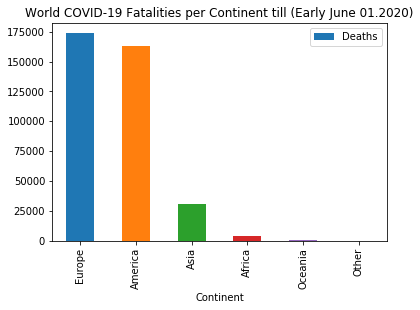

In [23]:
deaths_by_continent.plot(kind='bar', x='Continent', y='Deaths', legend=True)
plt.title("World COVID-19 Fatalities per Continent till (Early June 01.2020)")
plt.savefig('wcov19contfate')

In [24]:
# By Country
confirmed_by_country = ndf.groupby(['Country'])['Confirmed'].sum().to_frame(name = 'Confirmed').reset_index()
confirmed_by_country.columns = ['Country','Confirmed']
confirmed_by_country.sort_values(by='Confirmed', ascending=False, inplace=True)
confirmed_by_country.head(50)

,Country,Confirmed
196,US,1790191
27,Brazil,514849
157,Russia,405843
195,UK,274762
177,Spain,239429
97,Italy,233019
90,India,190535
74,Germany,181815
150,Peru,164476
193,Turkey,163942


In [25]:
# By Continent
confirmed_by_continent = ndf.groupby(['Continent'])['Confirmed'].sum().to_frame(name = 'Confirmed').reset_index()
confirmed_by_continent.columns = ['Continent','Confirmed']
confirmed_by_continent.sort_values(by='Confirmed', ascending=False, inplace=True)
confirmed_by_continent.head()

,Continent,Confirmed
1,America,2904566
3,Europe,1951284
2,Asia,1123892
0,Africa,146996
4,Oceania,8651


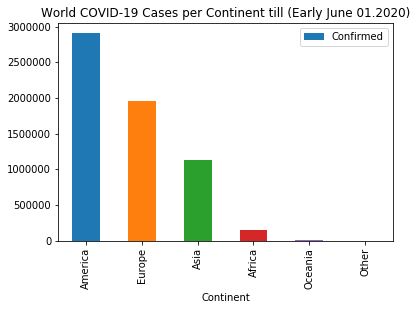

In [26]:
confirmed_by_continent.plot(kind='bar', x='Continent', y='Confirmed', legend=True)
plt.title("World COVID-19 Cases per Continent till (Early June 01.2020)")
plt.savefig('wcov19contcases')

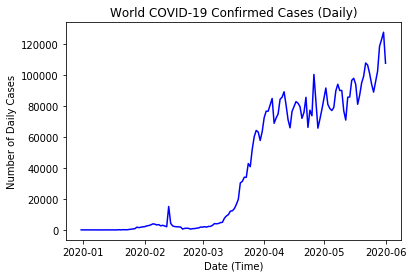

In [27]:
# Plot confirmed cases worldwide
cf = ndf.groupby('Date')[['Country','Confirmed']].sum()

plt.xlabel('Date (Time)')
plt.ylabel('Number of Daily Cases')
plt.title('World COVID-19 Confirmed Cases (Daily)')

plt.plot(cf, color='blue')

In [28]:
# Plot and save trendline graph
def create_trend_line(ndf, col3, col4):
    fig, ax = plt.subplots(figsize=(10,6))
    ndf.groupby(['Date'])[['Confirmed', 'Deaths']].sum().plot(ax=ax, marker='+')
    fig = ax.get_figure()

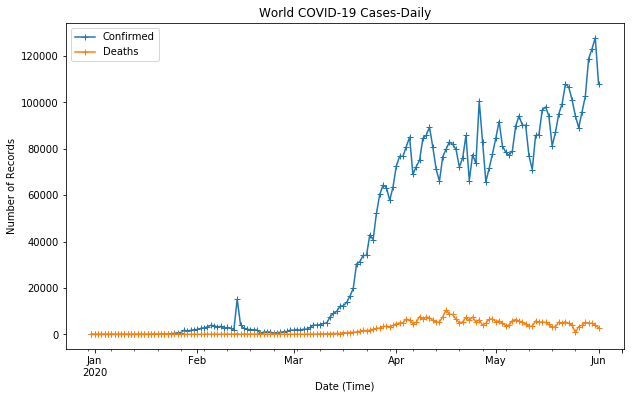

In [29]:
create_trend_line(ndf, 'Confirmed', 'Deaths')
plt.xlabel('Date (Time)')
plt.ylabel('Number of Records')
plt.title('World COVID-19 Cases-Daily')
plt.savefig('wcovid19daily')

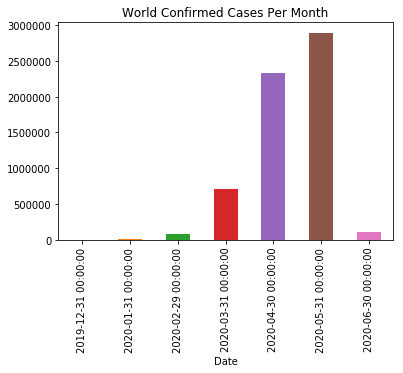

In [30]:
ndf['Confirmed'].resample('M').sum().plot(kind='bar', title='World Confirmed Cases Per Month')
plt.savefig('wcov19casespermonth')

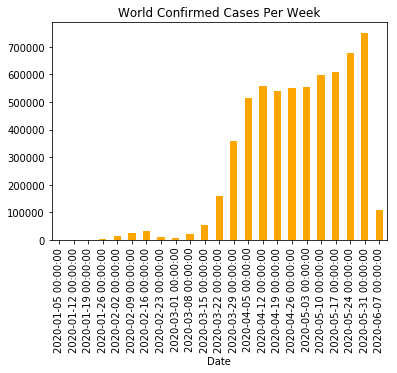

In [31]:
ndf['Confirmed'].resample('W').sum().plot(kind='bar', color='orange', title='World Confirmed Cases Per Week')
plt.savefig('wcov19casesperweek')

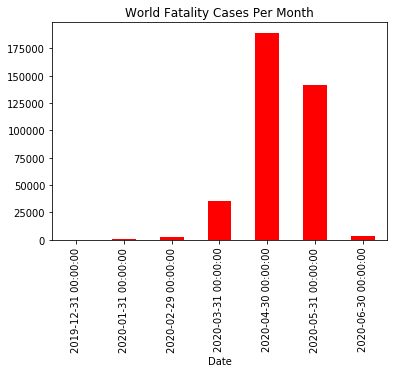

In [32]:
ndf['Deaths'].resample('M').sum().plot(kind='bar', color='red', title='World Fatality Cases Per Month')
plt.savefig('wcov19fatpermonth')

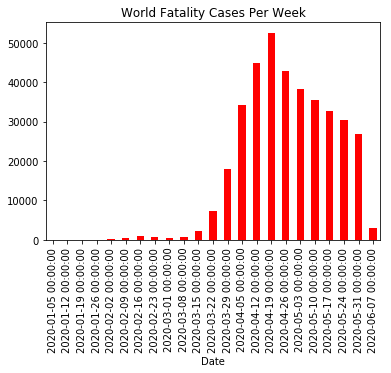

In [33]:
ndf['Deaths'].resample('W').sum().plot(kind='bar', color='red', title='World Fatality Cases Per Week')
plt.savefig('wcov19fatperweek')

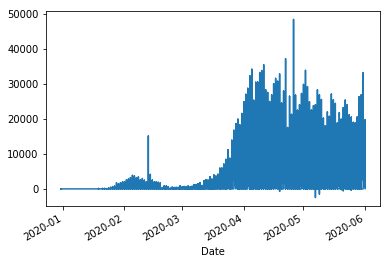

In [34]:
ndf['Confirmed'].plot()

In [35]:
ndf.head()

,Confirmed,Deaths,Country,Continent
Date,,,,
2020-06-01,680,8,Afghanistan,Asia
2020-05-31,866,3,Afghanistan,Asia
2020-05-30,623,11,Afghanistan,Asia
2020-05-29,580,8,Afghanistan,Asia
2020-05-28,625,7,Afghanistan,Asia


In [36]:
con_cases = ndf['Confirmed'].sum()
dt_cases = ndf['Deaths'].sum()

In [37]:
fatality_rate = dt_cases/(con_cases+dt_cases)*100

In [38]:
fatality_rate

5.713895421932156

In [39]:
dt_cases

371857

In [40]:
con_cases

6136085

In [41]:
# visualization of most infected countries in the world

# CHINA STATE
df_cn = ndf[ndf['Country']=='China'].reset_index()
# ITALY STATE               
df_it = ndf[ndf['Country']=='Italy'].reset_index()
# IRAN STATE
df_ir = ndf[ndf['Country']=='Iran'].reset_index()
# SPAIN STATE
df_sp = ndf[ndf['Country']=='Spain'].reset_index()
# FRANCE STATE
df_fr = ndf[ndf['Country']=='France'].reset_index()
# SOUTH KOREA STATE
df_skr = ndf[ndf['Country']=='South Korea'].reset_index()

# filter down on dates
df_cn  = df_cn[df_cn['Date'] >= ('2020-01-17')]
df_it = df_it[df_it['Date'] >= ('2020-01-17')]
df_ir = df_ir[df_ir['Date'] >= ('2020-01-17')]
df_sp = df_sp[df_sp['Date'] >= ('2020-01-17')]
df_fr = df_fr[df_fr['Date'] >= ('2020-01-17')]
df_skr = df_skr[df_skr['Date'] >= ('2020-01-17')]

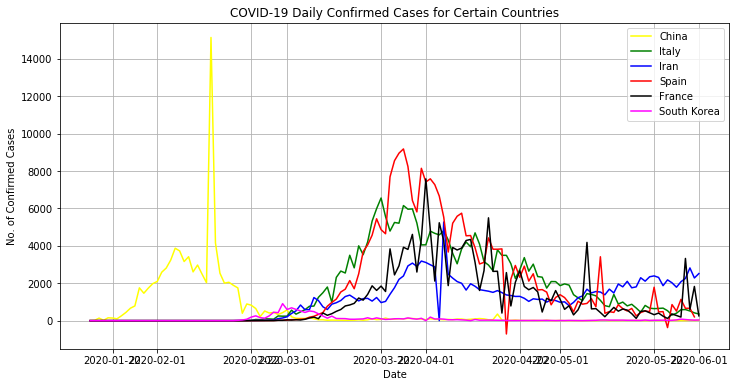

In [42]:
# plotting

fig, ax = plt.subplots(figsize=(12,6))
ax.plot(df_cn['Date'], df_cn['Confirmed'],color='yellow')
ax.plot(df_it['Date'], df_it['Confirmed'],color='green')
ax.plot(df_ir['Date'], df_ir['Confirmed'],color='blue')
ax.plot(df_sp['Date'], df_sp['Confirmed'],color='red')
ax.plot(df_fr['Date'], df_fr['Confirmed'],color='black')
ax.plot(df_skr['Date'], df_skr['Confirmed'],color='magenta')



ax.set(xlabel='Date', ylabel='No. of Confirmed Cases',
       title='COVID-19 Daily Confirmed Cases for Certain Countries')
ax.legend(['China','Italy','Iran','Spain','France','South Korea'])
ax.grid()
plt.savefig('covidstate1')

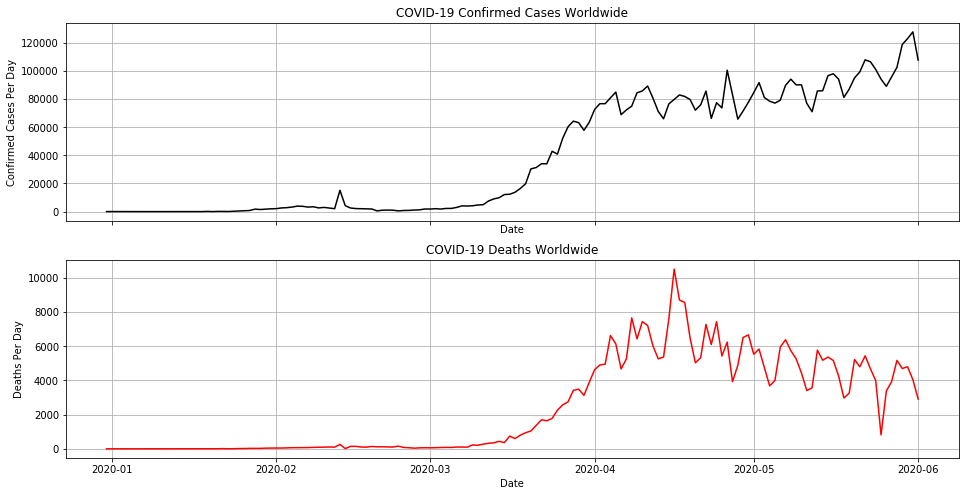

In [43]:
wdf = ndf.groupby(['Date'])[['Confirmed','Deaths']].sum().reset_index()

#plotting new cases by day worldwide
plt.rcParams['figure.figsize'] = [16, 8]
fig, ax = plt.subplots(2,sharex=True)

# top chart of cases
ax[0].plot(wdf['Date'], wdf['Confirmed'],color='black')
ax[0].set(xlabel='Date', ylabel='Confirmed Cases Per Day',
       title='COVID-19 Confirmed Cases Worldwide')
ax[0].grid()
plt.savefig('covidworldwidestate')

# bottom chart of deaths
ax[1].plot(wdf['Date'], wdf['Deaths'],color='red')
ax[1].set(xlabel='Date', ylabel='Deaths Per Day',
       title='COVID-19 Deaths Worldwide')
ax[1].grid()
plt.savefig('covidworldwidedeaths')

In [44]:
ndf.Confirmed.sum()

6136085

In [45]:
ndf.Deaths.sum()

371857

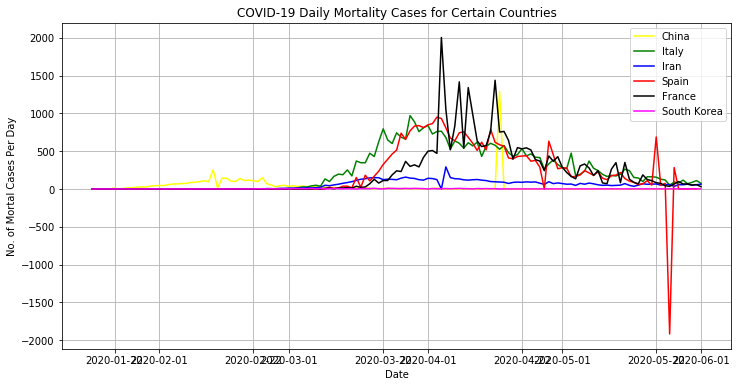

In [46]:
# plotting

fig, ax = plt.subplots(figsize=(12,6))
ax.plot(df_cn['Date'], df_cn['Deaths'],color='yellow')
ax.plot(df_it['Date'], df_it['Deaths'],color='green')
ax.plot(df_ir['Date'], df_ir['Deaths'],color='blue')
ax.plot(df_sp['Date'], df_sp['Deaths'],color='red')
ax.plot(df_fr['Date'], df_fr['Deaths'],color='black')
ax.plot(df_skr['Date'], df_skr['Deaths'],color='magenta')



ax.set(xlabel='Date', ylabel='No. of Mortal Cases Per Day',
       title='COVID-19 Daily Mortality Cases for Certain Countries')
ax.legend(['China','Italy','Iran','Spain','France','South Korea'])
ax.grid()
plt.savefig('covideathsstate2')

In [47]:
ndf.head()

,Confirmed,Deaths,Country,Continent
Date,,,,
2020-06-01,680,8,Afghanistan,Asia
2020-05-31,866,3,Afghanistan,Asia
2020-05-30,623,11,Afghanistan,Asia
2020-05-29,580,8,Afghanistan,Asia
2020-05-28,625,7,Afghanistan,Asia


In [48]:
# Calculate Italy mortality rate
df_it
itcon = df_it['Confirmed'].sum()
itdt = df_it['Deaths'].sum()
it_mort_rate = itdt/(itcon+itdt)*100

In [49]:
it_mort_rate

12.541567517659157

In [50]:
# Italy mortality rate Compared to World Average
itw = (it_mort_rate/fatality_rate) * 100

In [51]:
print('Italy Mortality Rate Compared to World Average is :', itw ,'%')

Italy Mortality Rate Compared to World Average is : 219.49242314655842 %


In [52]:
# Calculate China mortality rate
df_cn
chcon = df_cn['Confirmed'].sum()
chdt = df_cn['Deaths'].sum()
ch_mort_rate = chdt/(chcon+chdt)*100

In [53]:
ch_mort_rate

5.225192732518822

In [54]:
# China Mortality rate compared to World Average
chw = (ch_mort_rate/fatality_rate) * 100

In [55]:
print('China Mortality Rate Compared to World Average is :', chw ,'%')

China Mortality Rate Compared to World Average is : 91.44711876354086 %


In [56]:
# Calculate Spain mortality rate
df_sp
spcon = df_sp['Confirmed'].sum()
spdt = df_sp['Deaths'].sum()
sp_mort_rate = spdt/(spcon+spdt)*100

In [57]:
sp_mort_rate

10.176848392082714

In [58]:
# Spain Mortality rate compared to World Average
spw = (sp_mort_rate/fatality_rate) * 100

In [59]:
print('Spain Mortality Rate Compared to World Average is :', spw ,'%')

Spain Mortality Rate Compared to World Average is : 178.10701177728959 %


In [60]:
# Calculate France mortality rate
df_fr
frcon = df_fr['Confirmed'].sum()
frdt = df_fr['Deaths'].sum()
fr_mort_rate = frdt/(frcon+frdt)*100

In [61]:
fr_mort_rate

15.951926005926174

In [62]:
# France Mortality rate compared to World Average
frw = (fr_mort_rate/fatality_rate) * 100

In [63]:
print('France Mortality Rate Compared to World Average is :', frw ,'%')

France Mortality Rate Compared to World Average is : 279.1777732699914 %


In [64]:
# Calculate Iran mortality rate
df_ir
ircon = df_ir['Confirmed'].sum()
irdt = df_ir['Deaths'].sum()
ir_mort_rate = irdt/(ircon+irdt)*100

In [65]:
ir_mort_rate

4.895675706221784

In [66]:
# Iran Mortality rate compared to World Average
irw = (ir_mort_rate/fatality_rate) * 100

In [67]:
print('Iran Mortality Rate Compared to World Average is :', irw ,'%')

Iran Mortality Rate Compared to World Average is : 85.68017691451394 %


In [68]:
# visualization of most infected countries in the world part 2

# Germany STATE
df_gr = ndf[ndf['Country']=='Germany'].reset_index()
# USA STATE               
df_us = ndf[ndf['Country']=='US'].reset_index()
# UK STATE
df_uk = ndf[ndf['Country']=='UK'].reset_index()
# NL STATE
df_nl = ndf[ndf['Country']=='Netherlands'].reset_index()
# SWISS STATE
df_sw = ndf[ndf['Country']=='Switzerland'].reset_index()
# Japan STATE
df_jp = ndf[ndf['Country']=='Japan'].reset_index()

# filter down on dates
df_gr  = df_gr[df_gr['Date'] >= ('2020-01-17')]
df_us = df_us[df_us['Date'] >= ('2020-01-17')]
df_uk = df_uk[df_uk['Date'] >= ('2020-01-17')]
df_nl = df_nl[df_nl['Date'] >= ('2020-01-17')]
df_sw = df_sw[df_sw['Date'] >= ('2020-01-17')]
df_jp = df_jp[df_jp['Date'] >= ('2020-01-17')]

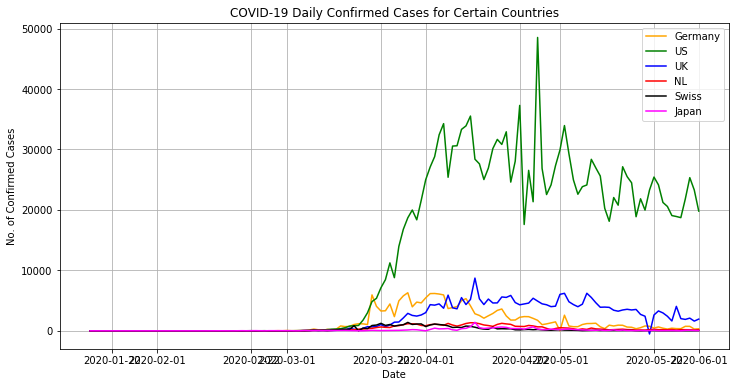

In [69]:
# plotting

fig, ax = plt.subplots(figsize=(12,6))
ax.plot(df_gr['Date'], df_gr['Confirmed'],color='orange')
ax.plot(df_us['Date'], df_us['Confirmed'],color='green')
ax.plot(df_uk['Date'], df_uk['Confirmed'],color='blue')
ax.plot(df_nl['Date'], df_nl['Confirmed'],color='red')
ax.plot(df_sw['Date'], df_sw['Confirmed'],color='black')
ax.plot(df_jp['Date'], df_jp['Confirmed'],color='magenta')


ax.set(xlabel='Date', ylabel='No. of Confirmed Cases',
       title='COVID-19 Daily Confirmed Cases for Certain Countries')
ax.legend(['Germany','US','UK','NL','Swiss','Japan'])
ax.grid()
plt.savefig('covidstate2')

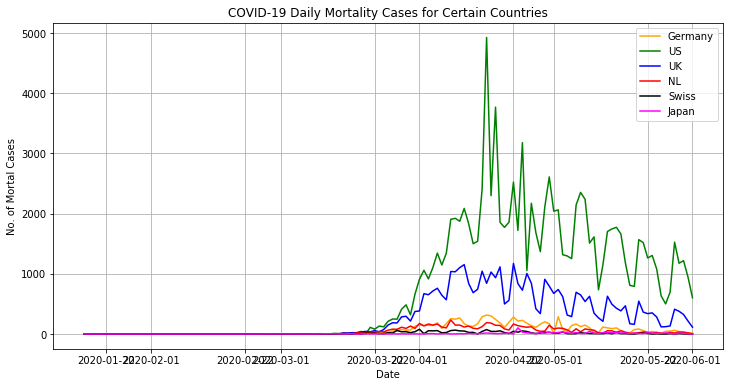

In [70]:
# plotting

fig, ax = plt.subplots(figsize=(12,6))
ax.plot(df_gr['Date'], df_gr['Deaths'],color='orange')
ax.plot(df_us['Date'], df_us['Deaths'],color='green')
ax.plot(df_uk['Date'], df_uk['Deaths'],color='blue')
ax.plot(df_nl['Date'], df_nl['Deaths'],color='red')
ax.plot(df_sw['Date'], df_sw['Deaths'],color='black')
ax.plot(df_jp['Date'], df_jp['Deaths'],color='magenta')


ax.set(xlabel='Date', ylabel='No. of Mortal Cases',
       title='COVID-19 Daily Mortality Cases for Certain Countries')
ax.legend(['Germany','US','UK','NL','Swiss','Japan'])
ax.grid()
plt.savefig('covideathsstate3')

In [71]:
# visualization of some infected countries in the world part 3

# Egypt STATE
df_eg = ndf[ndf['Country']=='Egypt'].reset_index()
# Israel STATE               
df_il = ndf[ndf['Country']=='Israel'].reset_index()
# Turkey STATE
df_tr = ndf[ndf['Country']=='Turkey'].reset_index()
# Iraq STATE
df_iq = ndf[ndf['Country']=='Iraq'].reset_index()
# Qatar STATE
df_qr = ndf[ndf['Country']=='Qatar'].reset_index()
# Bahrain STATE
df_bn = ndf[ndf['Country']=='Bahrain'].reset_index()

# filter down on dates
df_eg  = df_eg[df_eg['Date'] >= ('2020-01-17')]
df_il = df_il[df_il['Date'] >= ('2020-01-17')]
df_tr = df_tr[df_tr['Date'] >= ('2020-01-17')]
df_iq = df_iq[df_iq['Date'] >= ('2020-01-17')]
df_qr = df_qr[df_qr['Date'] >= ('2020-01-17')]
df_bn = df_bn[df_bn['Date'] >= ('2020-01-17')]

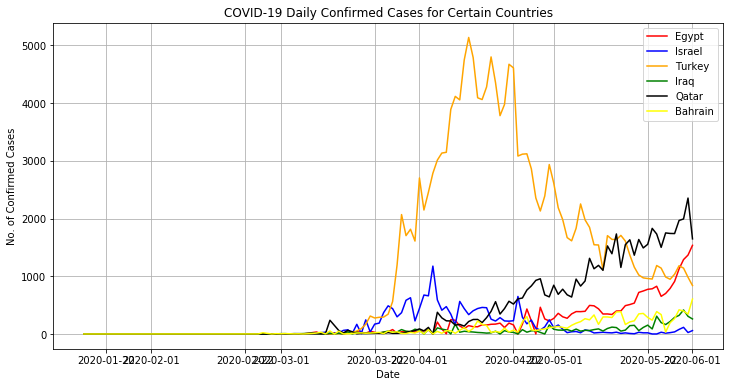

In [72]:
# plotting

fig, ax = plt.subplots(figsize=(12,6))
ax.plot(df_eg['Date'], df_eg['Confirmed'],color='red')
ax.plot(df_il['Date'], df_il['Confirmed'],color='blue')
ax.plot(df_tr['Date'], df_tr['Confirmed'],color='orange')
ax.plot(df_iq['Date'], df_iq['Confirmed'],color='green')
ax.plot(df_qr['Date'], df_qr['Confirmed'],color='black')
ax.plot(df_bn['Date'], df_bn['Confirmed'],color='yellow')


ax.set(xlabel='Date', ylabel='No. of Confirmed Cases',
       title='COVID-19 Daily Confirmed Cases for Certain Countries')
ax.legend(['Egypt','Israel','Turkey','Iraq','Qatar','Bahrain'])
ax.grid()
plt.savefig('covidstate3')

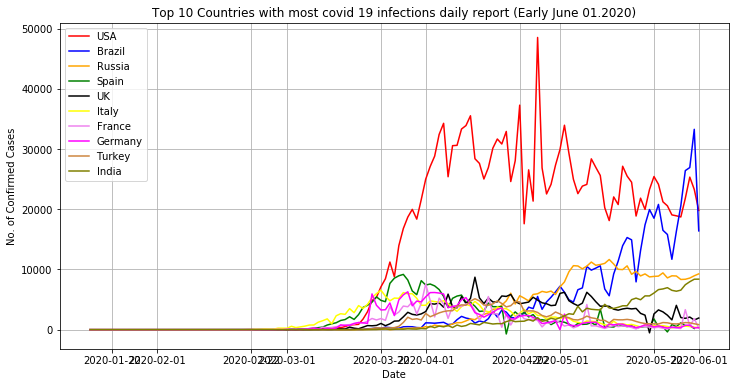

In [73]:
# Brazil STATE
df_br = ndf[ndf['Country']=='Brazil'].reset_index()
df_br = df_br[df_br['Date'] >= ('2020-01-17')]

# Russia STATE
df_ru = ndf[ndf['Country']=='Russia'].reset_index()
df_ru = df_ru[df_ru['Date'] >= ('2020-01-17')]

# India STATE
df_in = ndf[ndf['Country']=='India'].reset_index()
df_in = df_in[df_in['Date'] >= ('2020-01-17')]


# plotting Top 10 Countries with most covid 19 infections 

fig, ax = plt.subplots(figsize=(12,6))
ax.plot(df_us['Date'], df_us['Confirmed'],color='red')
ax.plot(df_br['Date'], df_br['Confirmed'],color='blue')
ax.plot(df_ru['Date'], df_ru['Confirmed'],color='orange')
ax.plot(df_sp['Date'], df_sp['Confirmed'],color='green')
ax.plot(df_uk['Date'], df_uk['Confirmed'],color='black')
ax.plot(df_it['Date'], df_it['Confirmed'],color='yellow')
ax.plot(df_fr['Date'], df_fr['Confirmed'],color='violet')
ax.plot(df_gr['Date'], df_gr['Confirmed'],color='magenta')
ax.plot(df_tr['Date'], df_tr['Confirmed'],color='peru')
ax.plot(df_in['Date'], df_in['Confirmed'],color='olive')

ax.set(xlabel='Date', ylabel='No. of Confirmed Cases',
       title='Top 10 Countries with most covid 19 infections daily report (Early June 01.2020)')
ax.legend(['USA','Brazil','Russia','Spain','UK','Italy', 'France', 'Germany', 'Turkey', 'India'])
ax.grid()
plt.savefig('topcovidstate')

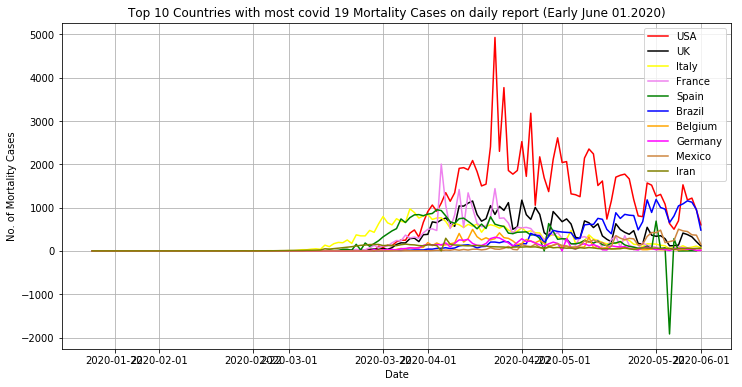

In [74]:
# Belgium STATE
df_bgm = ndf[ndf['Country']=='Belgium'].reset_index()
df_bgm = df_bgm[df_bgm['Date'] >= ('2020-01-17')]

# Mexico STATE
df_mx = ndf[ndf['Country']=='Mexico'].reset_index()
df_mx = df_mx[df_mx['Date'] >= ('2020-01-17')]

# plotting Top 10 Countries with most covid 19 Fatalities 

fig, ax = plt.subplots(figsize=(12,6))
ax.plot(df_us['Date'], df_us['Deaths'],color='red')
ax.plot(df_uk['Date'], df_uk['Deaths'],color='black')
ax.plot(df_it['Date'], df_it['Deaths'],color='yellow')
ax.plot(df_fr['Date'], df_fr['Deaths'],color='violet')
ax.plot(df_sp['Date'], df_sp['Deaths'],color='green')
ax.plot(df_br['Date'], df_br['Deaths'],color='blue')
ax.plot(df_bgm['Date'], df_bgm['Deaths'],color='orange')
ax.plot(df_gr['Date'], df_gr['Deaths'],color='magenta')
ax.plot(df_mx['Date'], df_mx['Deaths'],color='peru')
ax.plot(df_ir['Date'], df_ir['Deaths'],color='olive')

ax.set(xlabel='Date', ylabel='No. of Mortality Cases',
       title='Top 10 Countries with most covid 19 Mortality Cases on daily report (Early June 01.2020)')
ax.legend(['USA','UK','Italy','France','Spain','Brazil', 'Belgium', 'Germany', 'Mexico', 'Iran'])
ax.grid()
plt.savefig('topmortcovidstate')

In [75]:
twc = ndf.Confirmed.sum()
twd = ndf.Deaths.sum()

In [76]:
# South Africa STATE
df_sa = ndf[ndf['Country']=='South Africa'].reset_index()
# KSA STATE               
df_ksa = ndf[ndf['Country']=='Saudi Arabia'].reset_index()
# India STATE
df_in = ndf[ndf['Country']=='India'].reset_index()
# Russia STATE
df_ru = ndf[ndf['Country']=='Russia'].reset_index()
# Norway STATE
df_no = ndf[ndf['Country']=='Norway'].reset_index()
# Australia STATE
df_au = ndf[ndf['Country']=='Australia'].reset_index()
# Pakistan STATE
df_pk = ndf[ndf['Country']=='Pakistan'].reset_index()
# Indonesia STATE
df_inesia = ndf[ndf['Country']=='Indonesia'].reset_index()
# Brazil STATE
df_br = ndf[ndf['Country']=='Brazil'].reset_index()
# Sweden STATE
df_swd = ndf[ndf['Country']=='Sweden'].reset_index()


# filter down on dates
df_sa  = df_sa[df_sa['Date'] >= ('2020-01-17')]
df_ksa = df_ksa[df_ksa['Date'] >= ('2020-01-17')]
df_in = df_in[df_in['Date'] >= ('2020-01-17')]
df_ru = df_ru[df_ru['Date'] >= ('2020-01-17')]
df_no = df_no[df_no['Date'] >= ('2020-01-17')]
df_au = df_au[df_au['Date'] >= ('2020-01-17')]
df_pk = df_pk[df_pk['Date'] >= ('2020-01-17')]
df_inesia = df_inesia[df_inesia['Date'] >= ('2020-01-17')]
df_br = df_br[df_br['Date'] >= ('2020-01-17')]
df_swd = df_swd[df_swd['Date'] >= ('2020-01-17')]

In [77]:
#Germany

df_gr
grcon = df_gr['Confirmed'].sum()
grdt = df_gr['Deaths'].sum()
gr_mort_rate = grdt/(grcon+grdt)*100

In [78]:
#US

df_us
uscon = df_us['Confirmed'].sum()
usdt = df_us['Deaths'].sum()
us_mort_rate = usdt/(uscon+usdt)*100

In [79]:
#UK

df_uk
ukcon = df_uk['Confirmed'].sum()
ukdt = df_uk['Deaths'].sum()
uk_mort_rate = ukdt/(ukcon+ukdt)*100

In [80]:
#Netherlands

df_nl
nlcon = df_nl['Confirmed'].sum()
nldt = df_nl['Deaths'].sum()
nl_mort_rate = nldt/(nlcon+nldt)*100

In [81]:
#Swiss

df_sw
swcon = df_sw['Confirmed'].sum()
swdt = df_sw['Deaths'].sum()
sw_mort_rate = swdt/(swcon+swdt)*100

In [82]:
#South Korea

df_skr
skrcon = df_skr['Confirmed'].sum()
skrdt = df_skr['Deaths'].sum()
skr_mort_rate = skrdt/(skrcon+skrdt)*100

In [83]:
#Japan

df_jp
jpcon = df_jp['Confirmed'].sum()
jpdt = df_jp['Deaths'].sum()
jp_mort_rate = jpdt/(jpcon+jpdt)*100

In [84]:
#Egypt

df_eg
egcon = df_eg['Confirmed'].sum()
egdt = df_eg['Deaths'].sum()
eg_mort_rate = egdt/(egcon+egdt)*100

In [85]:
#Israel

df_il
ilcon = df_il['Confirmed'].sum()
ildt = df_il['Deaths'].sum()
il_mort_rate = ildt/(ilcon+ildt)*100

In [86]:
#Iraq

df_iq
iqcon = df_iq['Confirmed'].sum()
iqdt = df_iq['Deaths'].sum()
iq_mort_rate = iqdt/(iqcon+iqdt)*100

In [87]:
#Turkey

df_tr
trcon = df_tr['Confirmed'].sum()
trdt = df_tr['Deaths'].sum()
tr_mort_rate = trdt/(trcon+trdt)*100

In [88]:
#Qatar

df_qr
qrcon = df_qr['Confirmed'].sum()
qrdt = df_qr['Deaths'].sum()
qr_mort_rate = qrdt/(qrcon+qrdt)*100

In [89]:
#Bahrain

df_bn
bncon = df_bn['Confirmed'].sum()
bndt = df_bn['Deaths'].sum()
bn_mort_rate = bndt/(bncon+bndt)*100

In [90]:
#South Africa

df_sa
sacon = df_sa['Confirmed'].sum()
sadt = df_sa['Deaths'].sum()
sa_mort_rate = sadt/(sacon+sadt)*100

In [91]:
#India

df_in
incon = df_in['Confirmed'].sum()
indt = df_in['Deaths'].sum()
in_mort_rate = indt/(incon+indt)*100

In [92]:
#Pakistan

df_pk
pkcon = df_pk['Confirmed'].sum()
pkdt = df_pk['Deaths'].sum()
pk_mort_rate = pkdt/(pkcon+pkdt)*100

In [93]:
#Russia

df_ru
rucon = df_ru['Confirmed'].sum()
rudt = df_ru['Deaths'].sum()
ru_mort_rate = rudt/(rucon+rudt)*100

In [94]:
# Norway

df_no
nocon = df_no['Confirmed'].sum()
nodt = df_no['Deaths'].sum()
no_mort_rate = nodt/(nocon+nodt)*100

In [95]:
# KSA

df_ksa
ksacon = df_ksa['Confirmed'].sum()
ksadt = df_ksa['Deaths'].sum()
ksa_mort_rate = ksadt/(ksacon+ksadt)*100

In [96]:
# Australia

df_au
aucon = df_au['Confirmed'].sum()
audt = df_au['Deaths'].sum()
au_mort_rate = audt/(aucon+audt)*100

In [97]:
# Indonesia

df_inesia
inesiacon = df_inesia['Confirmed'].sum()
inesiadt = df_inesia['Deaths'].sum()
inesia_mort_rate = inesiadt/(inesiacon+inesiadt)*100

In [98]:
# Brazil

df_br
brcon = df_br['Confirmed'].sum()
brdt = df_br['Deaths'].sum()
br_mort_rate = brdt/(brcon+brdt)*100

In [99]:
# Sweden
df_swd
swdcon = df_swd['Confirmed'].sum()
swddt = df_swd['Deaths'].sum()
swd_mort_rate = swddt/(swdcon+swddt)*100

In [100]:
data = {'Confirmed Cases Worldwide (Per Million)':twc,'Death Cases Worldwide (Per Thousand)':twd,'World Fatality_rate % (Percentage)':fatality_rate, 
       'China Confirmed Cases':chcon, 'China Death Cases':chdt, 'China Fatality Rate %':ch_mort_rate,
       'Italy Confirmed Cases':itcon, 'Italy Death Cases':itdt, 'Italy Fatality Rate %':it_mort_rate,
       'Spain Confirmed Cases':spcon, 'Spain Death Cases':spdt, 'Spain Fatality Rate %': sp_mort_rate,
       'France Confirmed Cases':frcon, 'France Death Cases':frdt, 'France Fatality Rate %':fr_mort_rate,
       'Iran Confirmed Cases':ircon, 'Iran Death Cases':irdt, 'Iran Fatality Rate %':ir_mort_rate,
       'Germany Confirmed Cases':grcon, 'Germany Death Cases':grdt, 'Germany Fatality Rate %':gr_mort_rate,
       'US Confirmed Cases':uscon, 'US Death Cases':usdt, 'US Fatality Rate %':us_mort_rate,
       'UK Confirmed Cases':ukcon, 'UK Death Cases':ukdt, 'UK Fatality Rate %':uk_mort_rate,
       'Netherlands (Holland) Confirmed Cases':nlcon, 'Netherlands (Holland) Death Cases':nldt, 'Netherlands (Holland) Fatality Rate %':nl_mort_rate,
       'Swiss Confirmed Cases':swcon, 'Swiss Death Cases':swdt, 'Swiss Fatality Rate %':sw_mort_rate,
       'Norway Confirmed Cases':nocon, 'Norway Death Cases':nodt, 'Norway Fatality Rate %':no_mort_rate,
       'Sweden Confirmed Cases':swdcon, 'Sweden Death Cases':swddt, 'Sweden Fatality Rate %':swd_mort_rate,
       'South Korea Confirmed Cases':skrcon, 'South Korea Death Cases':skrdt, 'South Korea Fatality Rate %':skr_mort_rate,
       'Japan Confirmed Cases':jpcon, 'Japan Death Cases':jpdt, 'Japan Fatality Rate %':jp_mort_rate,
       'Russia Confirmed Cases':rucon, 'Russia Death Cases':rudt, 'Russia Fatality Rate %':ru_mort_rate,
       'Israel Confirmed Cases':ilcon, 'Israel Death Cases':ildt, 'Israel Fatality Rate %':il_mort_rate,
       'Iraq Confirmed Cases':iqcon, 'Iraq Death Cases':iqdt, 'Iraq Fatality Rate %':iq_mort_rate,
       'Turkey Confirmed Cases':trcon, 'Turkey Death Cases':trdt, 'Turkey Fatality Rate %':tr_mort_rate,
       'Qatar Confirmed Cases':qrcon, 'Qatar Death Cases':qrdt, 'Qatar Fatality Rate %':qr_mort_rate,
       'Saudi Arabia Confirmed Cases':ksacon, 'Saudi Arabia Death Cases':ksadt, 'Saudi Arabia Fatality Rate %': ksa_mort_rate,
       'Egypt Confirmed Cases':egcon, 'Egypt Death Cases':egdt, 'Egypt Fatality Rate %':eg_mort_rate,
       'South Africa Confirmed Cases':sacon, 'South Africa Death Cases':sadt, 'South Africa Fatality Rate %':sa_mort_rate,
       'India Confirmed Cases':incon, 'India Death Cases':indt, 'India Fatality Rate %': in_mort_rate,
       'Pakistan Confirmed Cases':pkcon, 'Pakistan Death Cases':pkdt, 'Pakistan Fatality Rate %': pk_mort_rate,
       'Australia Confirmed Cases':aucon, 'Australia Death Cases':audt, 'Australia Fatality Rate %': au_mort_rate,
       'Indonesia Confirmed Cases':inesiacon, 'Indonesia Death Cases':inesiadt, 'Indonesia Fatality Rate %': inesia_mort_rate,
       'Brazil Confirmed Cases':brcon, 'Brazil Death Cases':brdt, 'Brazil Fatality Rate %': br_mort_rate,
       }

data = pd.DataFrame.from_dict(data, orient='index' ,columns=['Total Count or Rate'])

data.style.background_gradient(cmap='Oranges')

,Total Count or Rate
Confirmed Cases Worldwide (Per Million),6.13608e+06
Death Cases Worldwide (Per Thousand),371857
World Fatality_rate % (Percentage),5.7139
China Confirmed Cases,84088
China Death Cases,4636
China Fatality Rate %,5.22519
Italy Confirmed Cases,233019
Italy Death Cases,33415
Italy Fatality Rate %,12.5416
Spain Confirmed Cases,239429


In [101]:
data = data.to_csv(r'statistics.csv')

In [102]:
data = pd.read_csv('statistics.csv')

In [103]:
data = data.rename(columns={'Unnamed: 0': 'State'})

In [104]:
data = data.astype({'Total Count or Rate': float})

In [105]:
data.head(85)

,State,Total Count or Rate
0,Confirmed Cases Worldwide (Per Million),6.136085e+06
1,Death Cases Worldwide (Per Thousand),3.718570e+05
2,World Fatality_rate % (Percentage),5.713895e+00
3,China Confirmed Cases,8.408800e+04
4,China Death Cases,4.636000e+03
5,China Fatality Rate %,5.225193e+00
6,Italy Confirmed Cases,2.330190e+05
7,Italy Death Cases,3.341500e+04
8,Italy Fatality Rate %,1.254157e+01
9,Spain Confirmed Cases,2.394290e+05


In [106]:
df_per_day = ndf.groupby('Date')[['Confirmed','Deaths']].sum()

In [107]:
df_per_day.head()

,Confirmed,Deaths
Date,,
2019-12-31,27,0
2020-01-01,0,0
2020-01-02,0,0
2020-01-03,17,0
2020-01-04,0,0


In [108]:
df_per_day.tail()

,Confirmed,Deaths
Date,,
2020-05-28,102583,5177
2020-05-29,118805,4701
2020-05-30,123018,4804
2020-05-31,127796,4051
2020-06-01,107759,2911


In [109]:
# Max. No. of confirmed cases per day
df_per_day['Confirmed'].max()

127796

In [110]:
# Date of Max. No. of confirmed cases
df_per_day['Confirmed'].idxmax()

Timestamp('2020-05-31 00:00:00')

In [111]:
# Min. No. of confirmed cases per day
df_per_day['Confirmed'].min()

0

In [112]:
# Date of Min. No. of confirmed cases
df_per_day['Confirmed'].idxmin()

Timestamp('2020-01-01 00:00:00')

In [113]:
# Max. No. of death cases per day
df_per_day['Deaths'].max()

10520

In [114]:
# Date of Max. No. of death cases
df_per_day['Deaths'].idxmax()

Timestamp('2020-04-16 00:00:00')

In [115]:
# Min. No. of death cases per day
df_per_day['Deaths'].min()

0

In [116]:
# Date of Min. No. of death cases
df_per_day['Deaths'].idxmin()

Timestamp('2019-12-31 00:00:00')

In [117]:
ndf['Country'].value_counts()

Guinea                               158
France                               154
Denmark                              154
Sweden                               154
US                                   154
Singapore                            154
Canada                               154
Iceland                              154
Switzerland                          154
Austria                              154
Italy                                154
Brazil                               154
Iran                                 154
Germany                              154
Russia                               154
China                                154
Norway                               154
Japan                                154
South Korea                          154
Australia                            154
Belgium                              154
Czechia                              154
UK                                   154
Netherlands                          154
India           

In [118]:
len(ndf['Country'].unique())

209

In [119]:
ndf.loc['2020-01'][['Confirmed','Deaths']].sum()

Confirmed    9799
Deaths        213
dtype: int64

In [120]:
ndf.loc['2020-03-23':'2020-03-25']

,Confirmed,Deaths,Country,Continent
Date,,,,
2020-03-25,2,0,Afghanistan,Asia
2020-03-24,6,1,Afghanistan,Asia
2020-03-23,10,0,Afghanistan,Asia
2020-03-25,23,1,Albania,Europe
2020-03-24,11,2,Albania,Europe
2020-03-23,13,0,Albania,Europe
2020-03-25,34,2,Algeria,Africa
2020-03-24,29,0,Algeria,Africa
2020-03-23,62,2,Algeria,Africa


In [121]:
ndf.loc['2020-02-01':'2020-03-01'][['Confirmed','Deaths']].sum()

Confirmed    77216
Deaths        2766
dtype: int64

In [122]:
ndf.loc['2020-03-01':'2020-04-01'][['Confirmed','Deaths']].sum()

Confirmed    783644
Deaths        39619
dtype: int64

In [123]:
ndf.loc['2020-04-01':'2020-04-15'][['Confirmed','Deaths']].sum()

Confirmed    1162545
Deaths         90241
dtype: int64

In [124]:
ndf.loc['2020-04-16':'2020-04-22'][['Confirmed','Deaths']].sum()

Confirmed    558178
Deaths        51946
dtype: int64

In [125]:
ndf.loc['2020-04-23':'2020-04-29'][['Confirmed','Deaths']].sum()

Confirmed    538438
Deaths        40561
dtype: int64

In [126]:
ndf.loc['2020-04-30':'2020-05-06'][['Confirmed','Deaths']].sum()

Confirmed    570162
Deaths        36444
dtype: int64

In [127]:
ndf.loc['2020-05-07':'2020-05-13'][['Confirmed','Deaths']].sum()

Confirmed    598112
Deaths        34594
dtype: int64

In [128]:
ndf.loc['2020-05-14':'2020-05-20'][['Confirmed','Deaths']].sum()

Confirmed    638272
Deaths        31459
dtype: int64

In [129]:
ndf.loc['2020-05-21':'2020-05-27'][['Confirmed','Deaths']].sum()

Confirmed    694149
Deaths        27057
dtype: int64

In [130]:
ndf.loc['2020-05-28':'2020-06-01'][['Confirmed','Deaths']].sum()

Confirmed    579961
Deaths        21644
dtype: int64

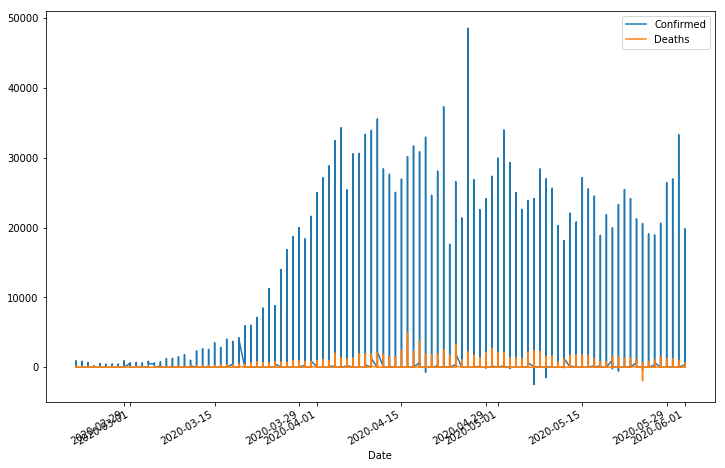

In [131]:
ndf.loc['2020-02-21':'2020-06-01'][['Confirmed','Deaths']].plot(figsize=(12,8))

In [132]:
new_data_f = ndf.copy()

In [133]:
df_by_date = new_data_f.groupby(['Date']).sum().reset_index(drop=None)

In [134]:
df_by_date

,Date,Confirmed,Deaths
0,2019-12-31,27,0
1,2020-01-01,0,0
2,2020-01-02,0,0
3,2020-01-03,17,0
4,2020-01-04,0,0
5,2020-01-05,15,0
6,2020-01-06,0,0
7,2020-01-07,0,0
8,2020-01-08,0,0
9,2020-01-09,0,0


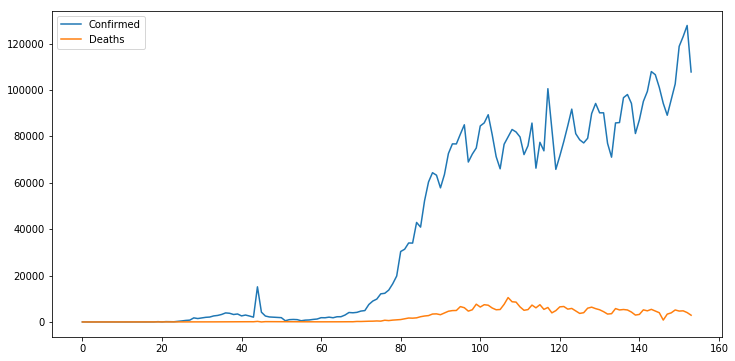

In [135]:
df_by_date[['Confirmed', 'Deaths']].plot(kind='line',figsize=(12,6))

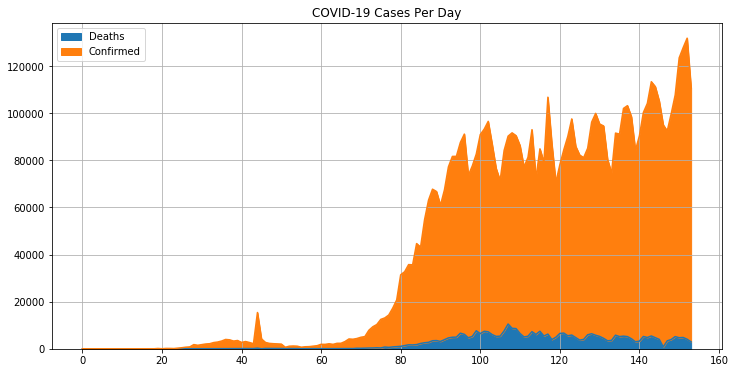

In [136]:
df_by_date[['Deaths','Confirmed']].plot(kind='area', title='COVID-19 Cases Per Day', 
                                        grid=True, figsize=(12,6))
plt.savefig('wcovid19daily22')

In [137]:
# # Situation in Egypt
df_eg.head()

,Date,Confirmed,Deaths,Country,Continent
0,2020-06-01,1536,46,Egypt,Africa
1,2020-05-31,1367,34,Egypt,Africa
2,2020-05-30,1289,34,Egypt,Africa
3,2020-05-29,1127,29,Egypt,Africa
4,2020-05-28,910,19,Egypt,Africa


In [138]:
df_eg.tail()

,Date,Confirmed,Deaths,Country,Continent
128,2020-01-21,0,0,Egypt,Africa
129,2020-01-20,0,0,Egypt,Africa
130,2020-01-19,0,0,Egypt,Africa
131,2020-01-18,0,0,Egypt,Africa
132,2020-01-17,0,0,Egypt,Africa


In [139]:
eg_ndf = df_eg.copy()

In [140]:
eg_ndf.set_index('Date', inplace=True)
eg_ndf.sort_index(inplace=True)

In [141]:
eg_ndf.loc['2020-02-01':'2020-03-01'][['Confirmed','Deaths']].sum()

Confirmed    1
Deaths       0
dtype: int64

In [168]:
eg_ndf.loc['2020-02-15':'2020-03-01'][['Confirmed','Deaths']].sum()

Confirmed    1
Deaths       0
dtype: int64

In [142]:
eg_ndf.loc['2020-03-01':'2020-03-15'][['Confirmed','Deaths']].sum()

Confirmed    92
Deaths        2
dtype: int64

In [143]:
eg_ndf.loc['2020-03-16':'2020-03-31'][['Confirmed','Deaths']].sum()

Confirmed    516
Deaths        38
dtype: int64

In [144]:
eg_ndf.loc['2020-04-01':'2020-04-08'][['Confirmed','Deaths']].sum()

Confirmed    713
Deaths        45
dtype: int64

In [145]:
eg_ndf.loc['2020-04-09':'2020-04-15'][['Confirmed','Deaths']].sum()

Confirmed    1028
Deaths         93
dtype: int64

In [146]:
eg_ndf.loc['2020-04-16':'2020-04-22'][['Confirmed','Deaths']].sum()

Confirmed    1140
Deaths         86
dtype: int64

In [147]:
eg_ndf.loc['2020-04-23':'2020-04-29'][['Confirmed','Deaths']].sum()

Confirmed    1552
Deaths         95
dtype: int64

In [148]:
eg_ndf.loc['2020-04-30':'2020-05-06'][['Confirmed','Deaths']].sum()

Confirmed    2159
Deaths         93
dtype: int64

In [149]:
eg_ndf.loc['2020-05-07':'2020-05-13'][['Confirmed','Deaths']].sum()

Confirmed    2892
Deaths         92
dtype: int64

In [150]:
eg_ndf.loc['2020-05-14':'2020-05-20'][['Confirmed','Deaths']].sum()

Confirmed    3391
Deaths        115
dtype: int64

In [151]:
eg_ndf.loc['2020-05-21':'2020-05-27'][['Confirmed','Deaths']].sum()

Confirmed    5272
Deaths        138
dtype: int64

In [152]:
eg_ndf.loc['2020-05-28':'2020-06-01'][['Confirmed','Deaths']].sum()

Confirmed    6229
Deaths        162
dtype: int64

In [169]:
eg_ndf.loc['2020-02-15':'2020-06-01'][['Confirmed','Deaths']].sum()

Confirmed    24985
Deaths         959
dtype: int64

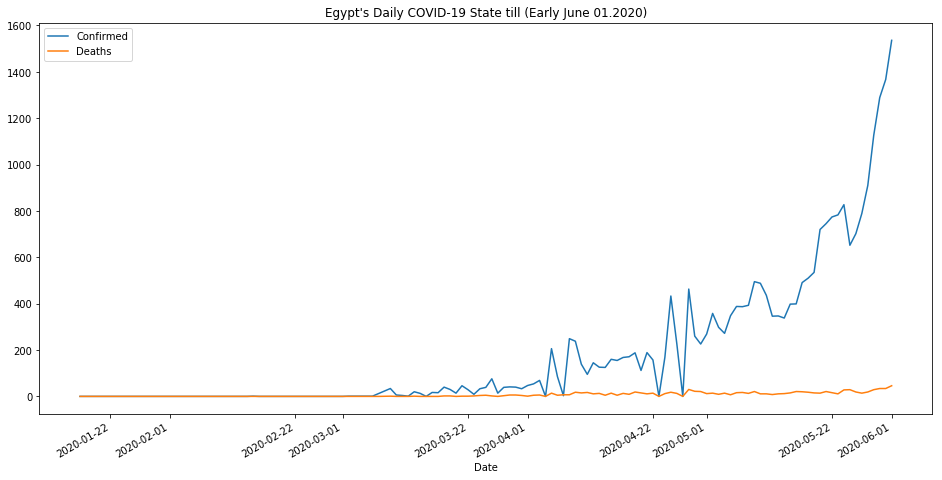

In [154]:
eg_ndf.plot()
plt.title("Egypt's Daily COVID-19 State till (Early June 01.2020)")
plt.savefig('egycov19state')

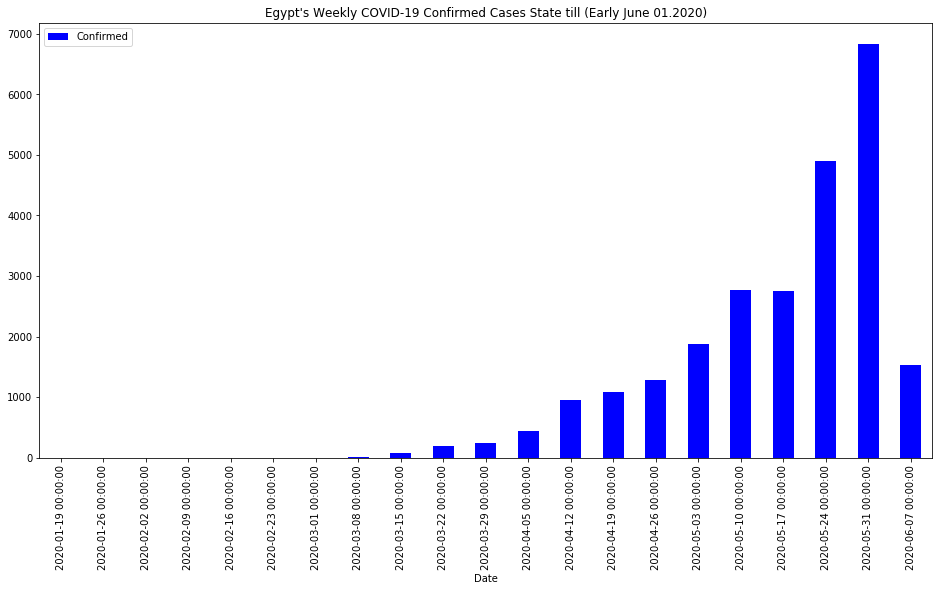

In [155]:
eg_ndf['Confirmed'].resample('W').sum().plot(kind='bar', color='blue', legend=True)
plt.title("Egypt's Weekly COVID-19 Confirmed Cases State till (Early June 01.2020)")
plt.savefig('egycov19weeklystate')

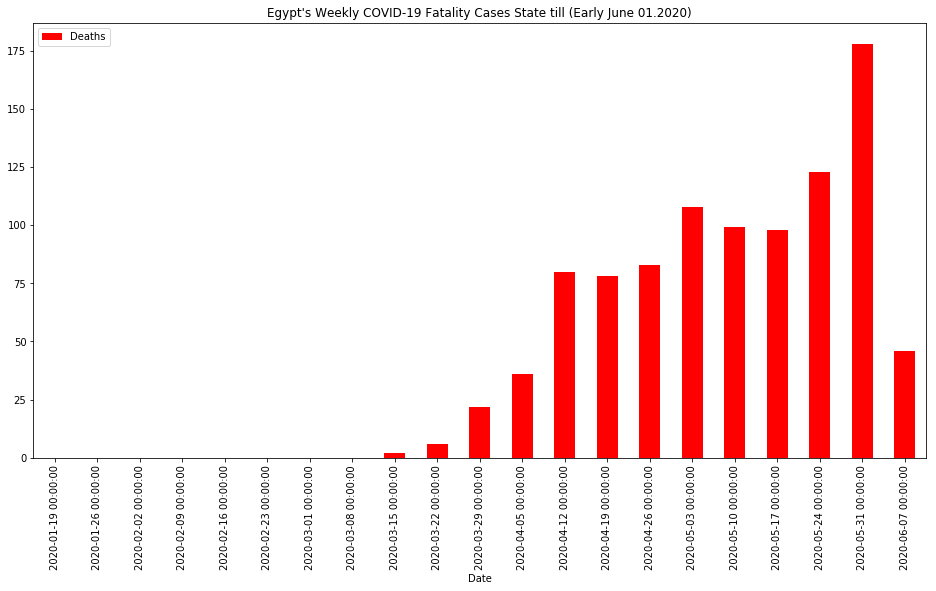

In [156]:
eg_ndf['Deaths'].resample('W').sum().plot(kind='bar', color='red', legend=True)
plt.title("Egypt's Weekly COVID-19 Fatality Cases State till (Early June 01.2020)")
plt.savefig('egycov19weeklystate')

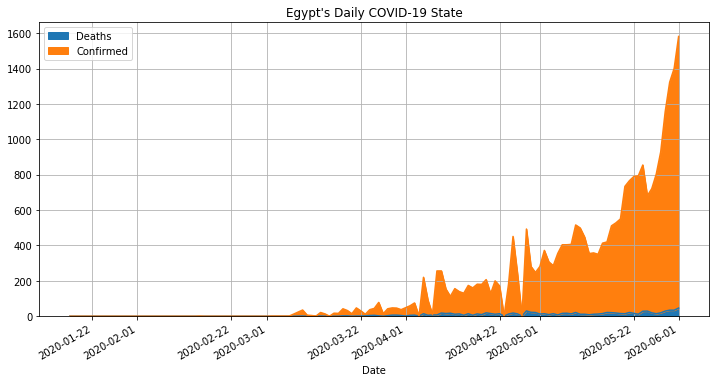

In [157]:
eg_ndf[['Deaths','Confirmed']].plot(kind='area', title="Egypt's Daily COVID-19 State", 
                                        grid=True, figsize=(12,6))

In [158]:
# Max. No. of confirmed cases recorded per day in Egypt
eg_ndf['Confirmed'].max()

1536

In [159]:
# Date of Max. No. of confirmed cases recorded in Egypt
eg_ndf['Confirmed'].idxmax()

Timestamp('2020-06-01 00:00:00')

In [160]:
# Max. No. of death cases recorded per day in Egypt
eg_ndf['Deaths'].max()

46

In [161]:
# Date of Max. No. of confirmed cases recorded in Egypt
eg_ndf['Deaths'].idxmax()

Timestamp('2020-06-01 00:00:00')